In [1]:
import sys
import numpy as np
import sounddevice as sd


sys.path.append("/Users/carlosedm10/projects/college/TDS")

from utils import continuous_time_plot, discrete_time_plot
from scipy.io import wavfile
from matplotlib import pyplot as plt


# Path to the .wav files
audio_A1 = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound1.wav"
audio_SH = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound2.wav"
audio_MM = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound3.wav"
audio_A2 = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound4.wav"
audio_TAP = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound5.wav"
audio_propio = "/Users/carlosedm10/projects/college/TDS/P1/propio.wav"

audios = [audio_A1, audio_SH, audio_MM, audio_A2, audio_TAP]

# Exercise 1

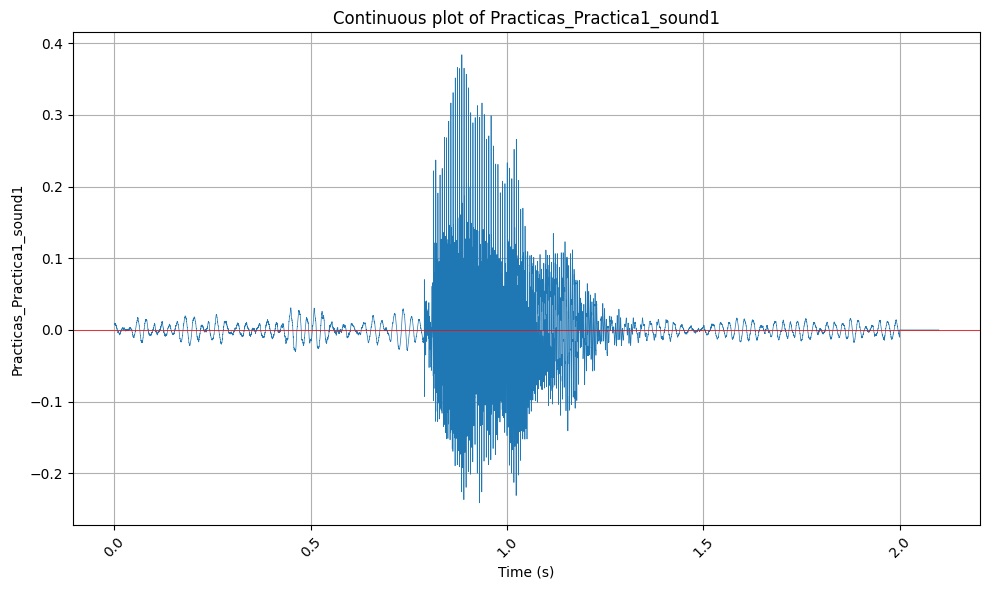

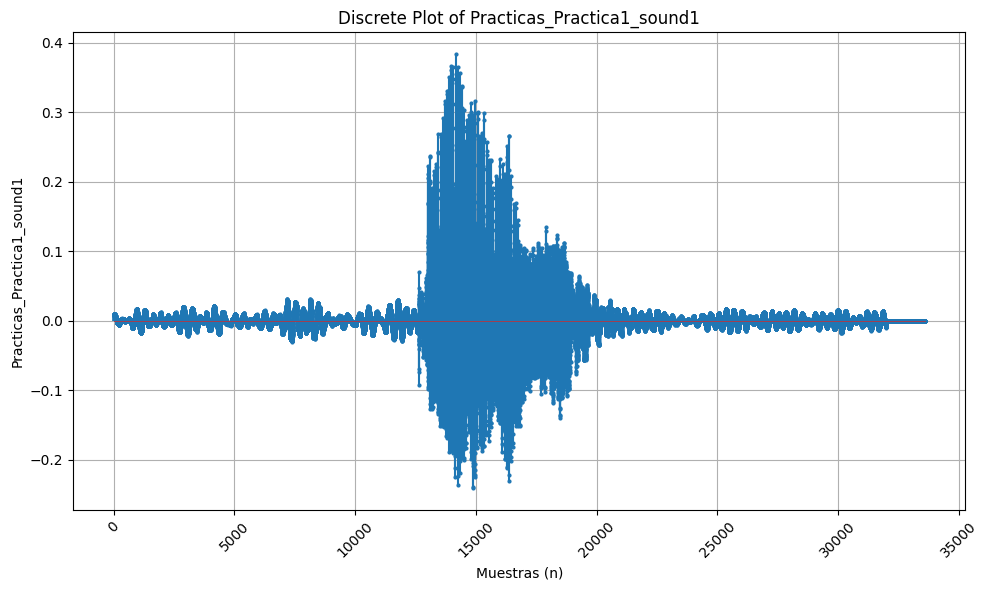

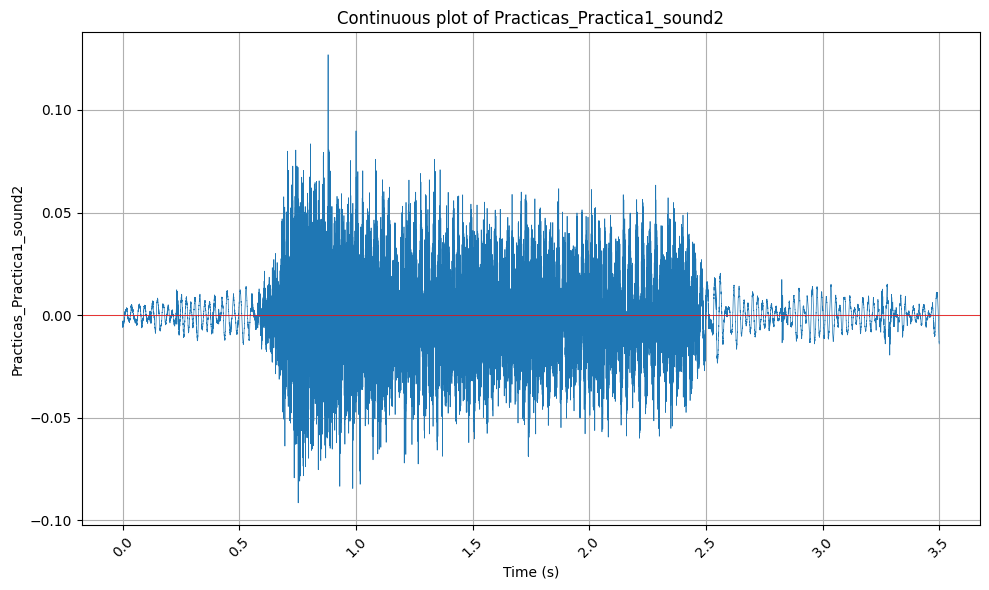

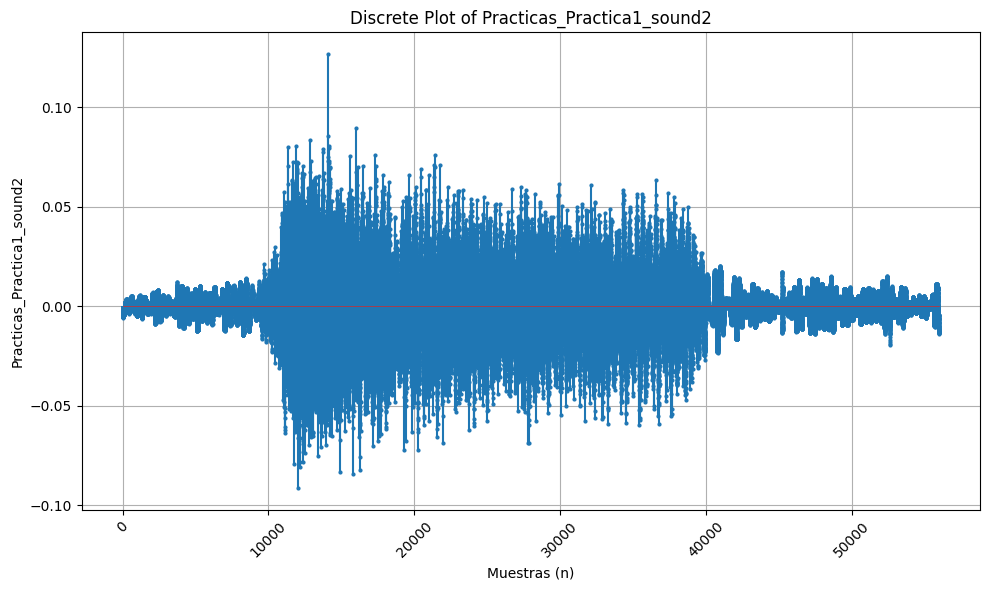

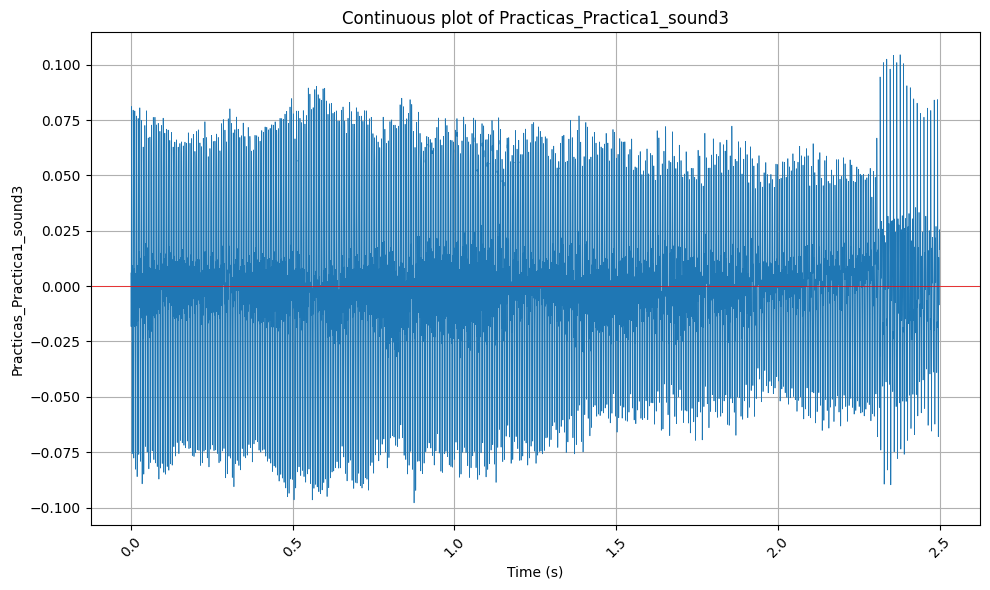

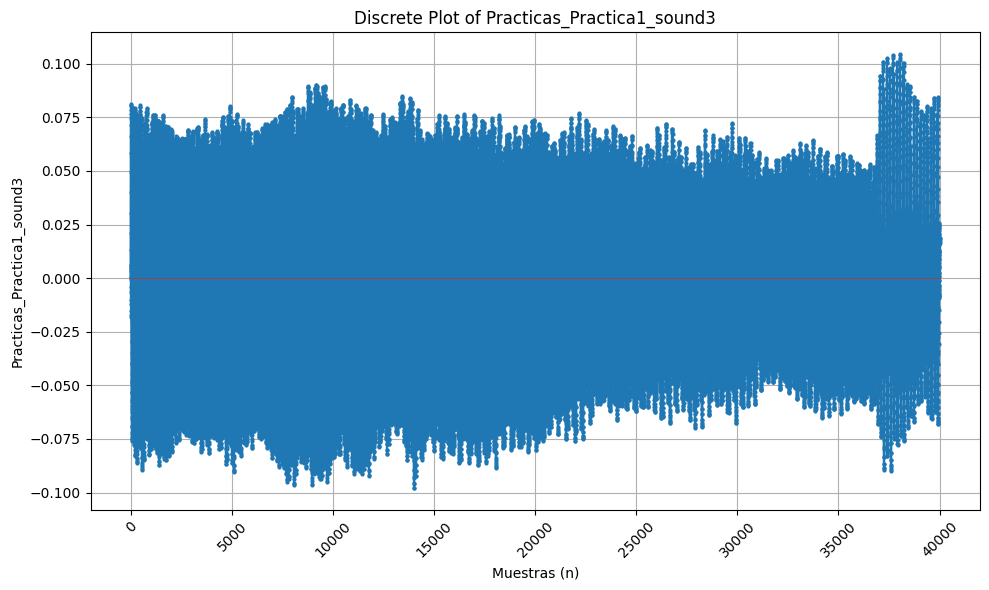

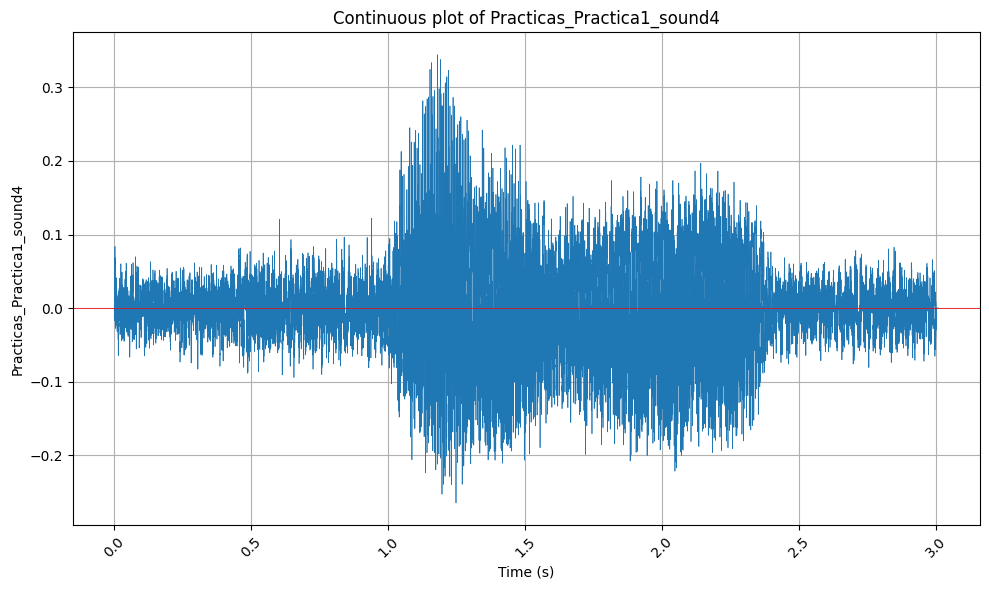

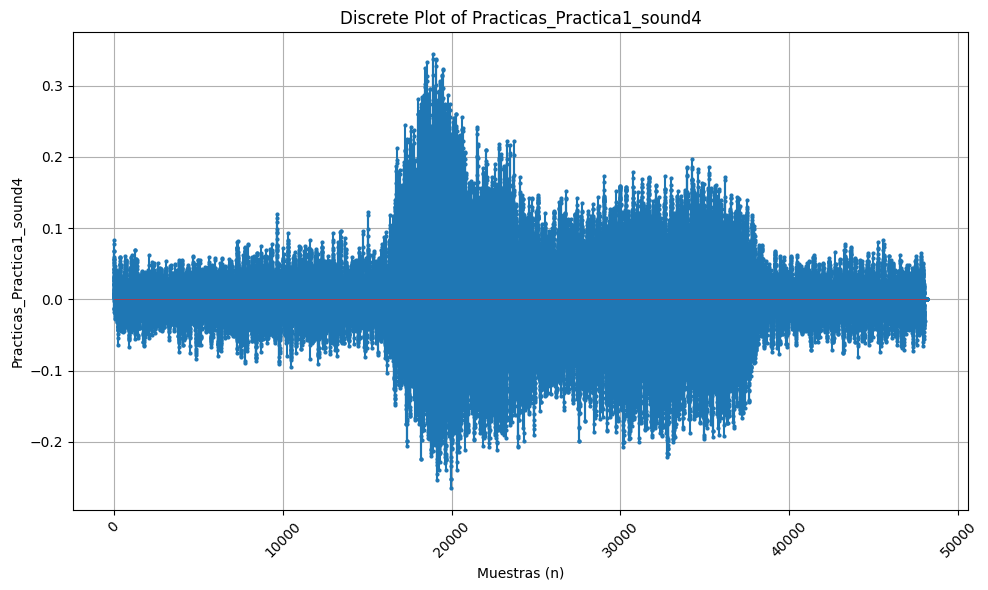

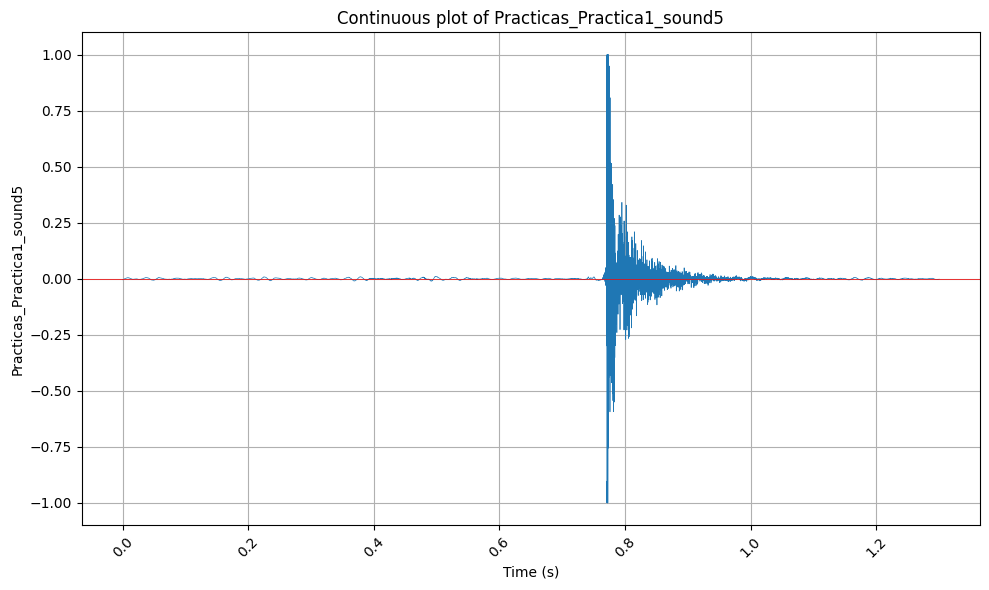

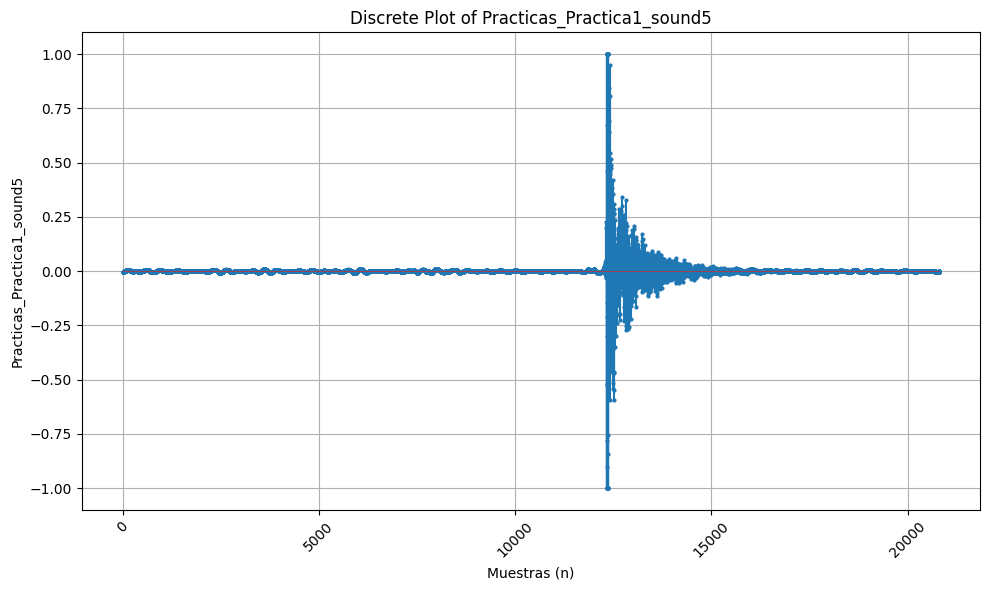

In [2]:
for audio in audios:
    freq, audio_data = wavfile.read(audio)
    time_vector = np.arange(len(audio_data)) / freq
    audio_data = audio_data / 2**15
    # Plot the audio data
    continuous_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        linewidth=0.5,
    )
    discrete_time_plot(
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        markersize=2,
        linewidth=0.5,
    )
    # Play the audio
    # sd.play(audio_data, freq)

    # # Wait for the audio to finish playing
    # sd.wait()

# Exercise 2

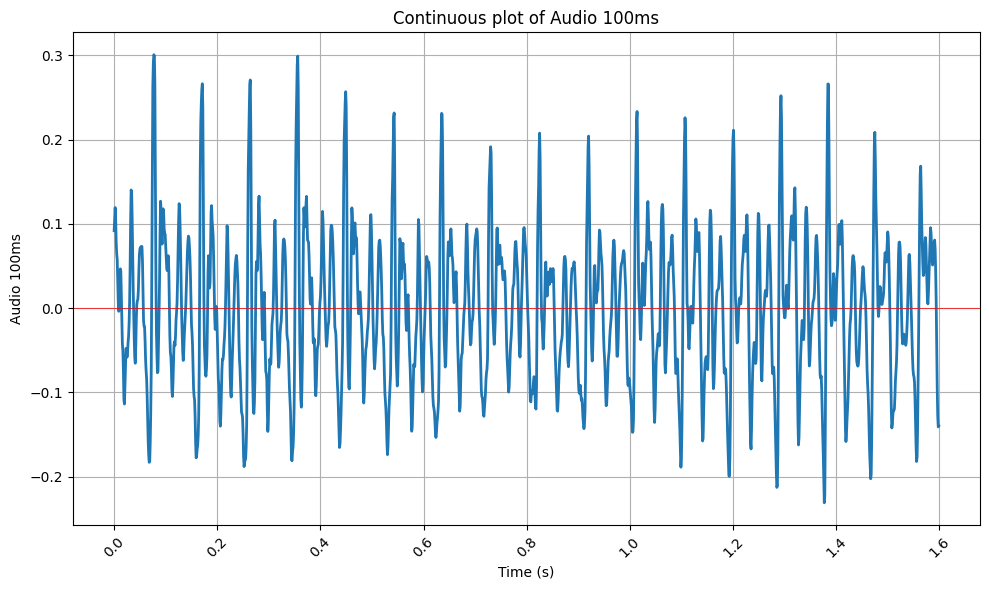

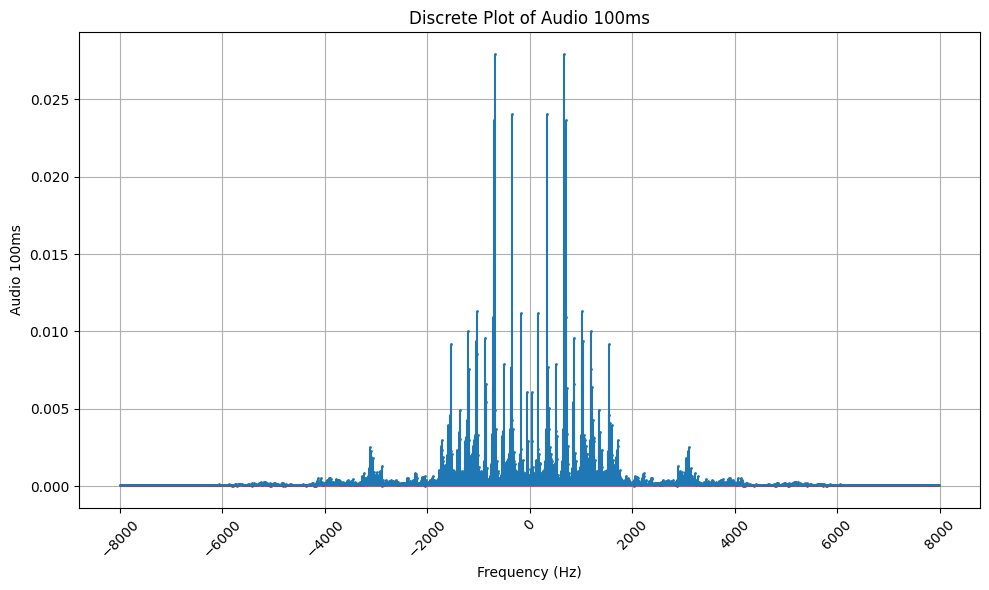

Fundamental Frequency: 680.0 Hz
Fundamental Period: 0.001 s
Power: 0.001 W
Power in dB: -28.643 dB
Energy: 45.924 J
Energy in dB: 16.62 dB


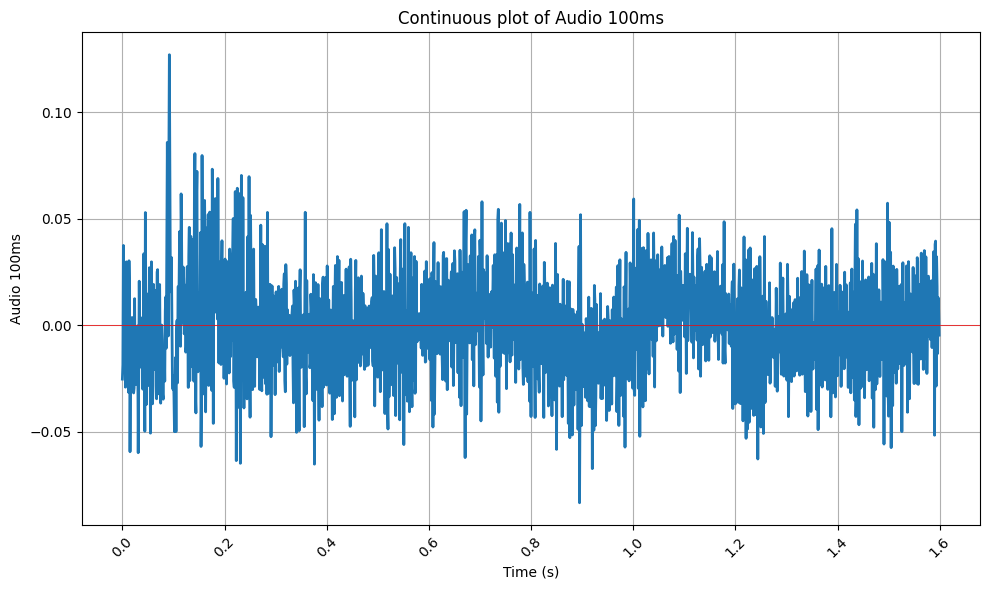

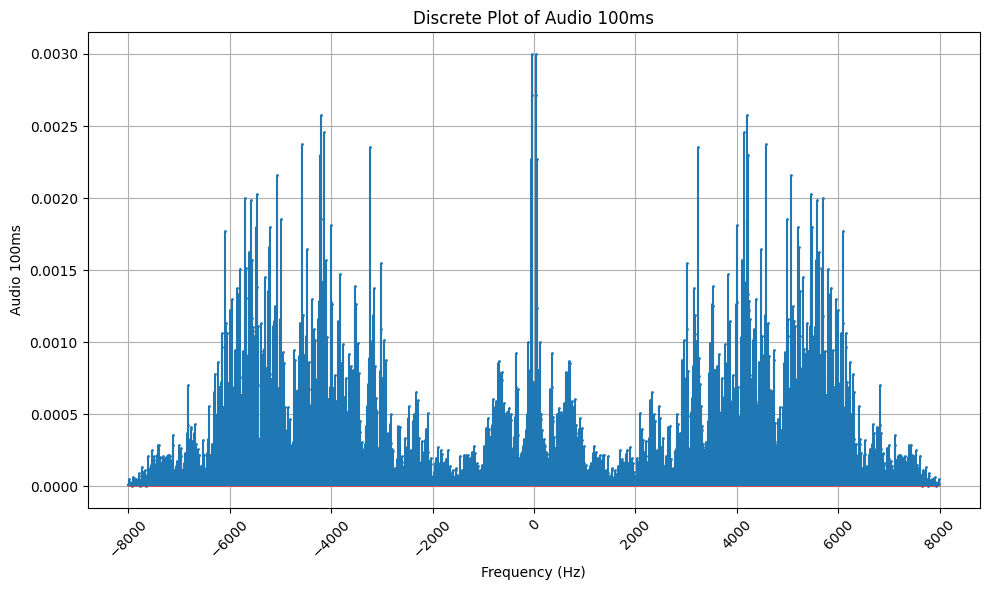

Fundamental Frequency: 30.0 Hz
Fundamental Period: 0.033 s
Power: 0.0 W
Power in dB: -36.364 dB
Energy: 12.937 J
Energy in dB: 11.118 dB


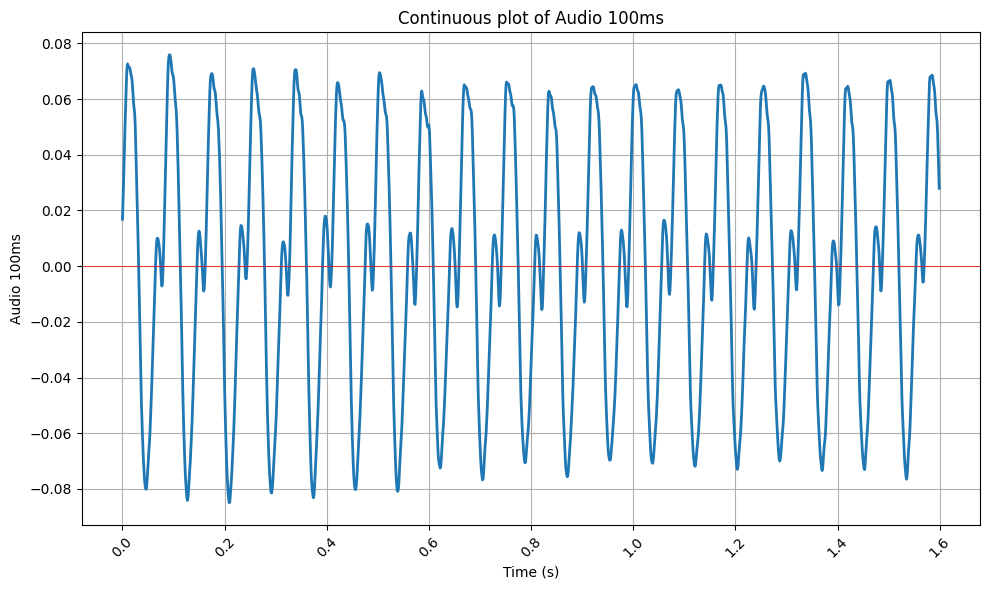

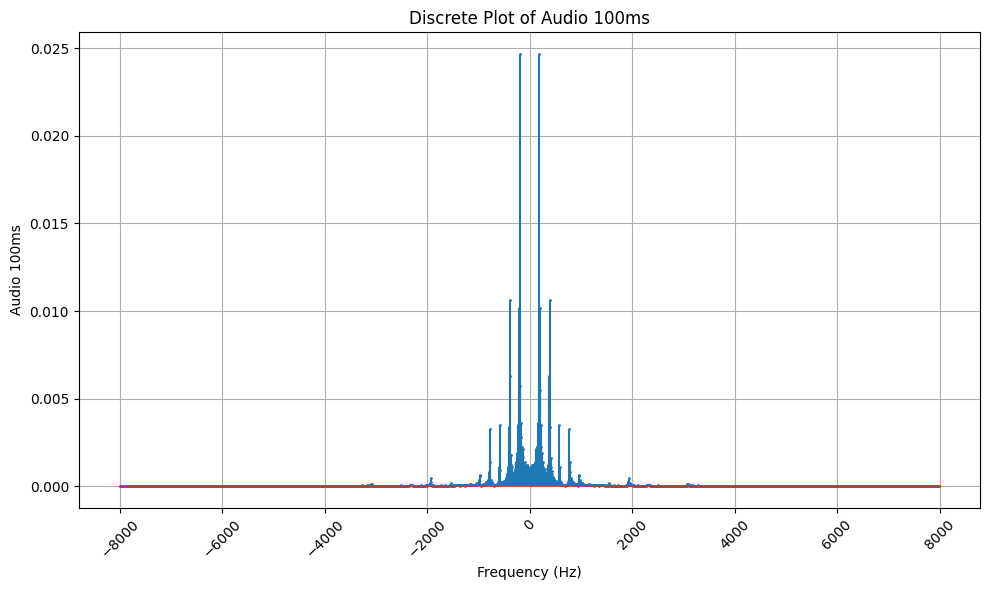

Fundamental Frequency: 190.0 Hz
Fundamental Period: 0.005 s
Power: 0.002 W
Power in dB: -27.538 dB
Energy: 70.518 J
Energy in dB: 18.483 dB


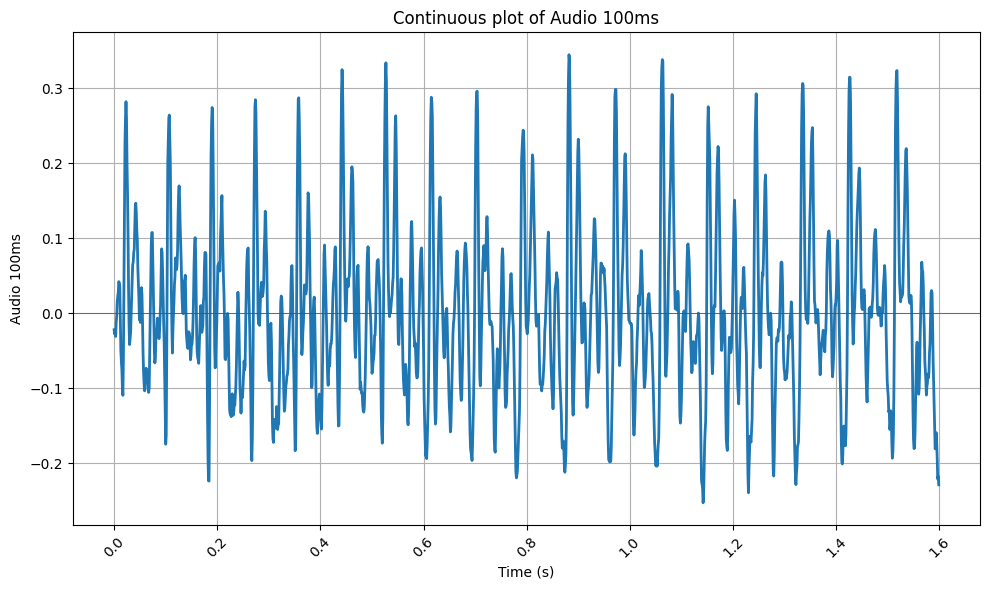

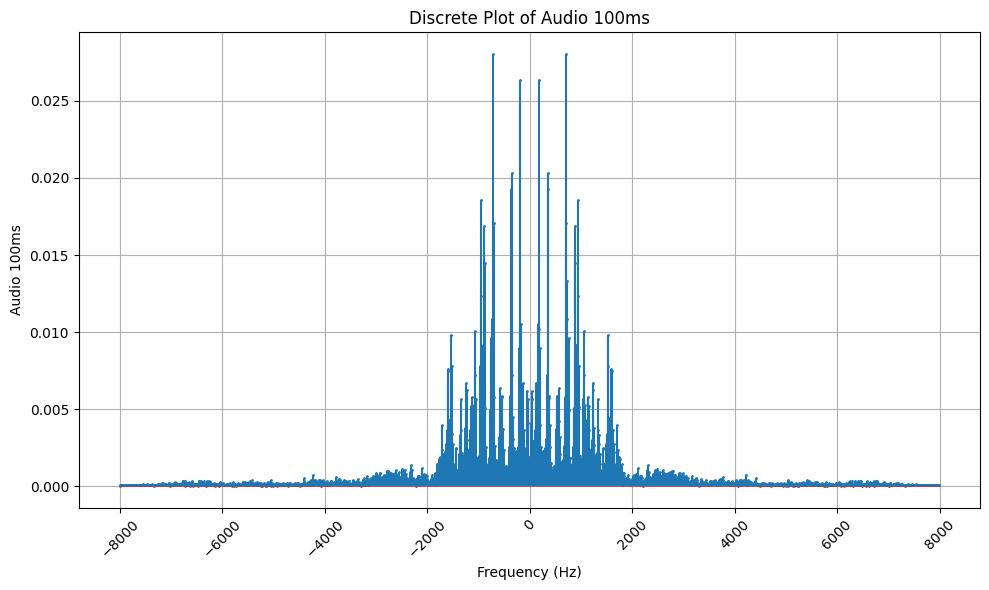

Fundamental Frequency: 710.0 Hz
Fundamental Period: 0.001 s
Power: 0.004 W
Power in dB: -24.415 dB
Energy: 174.275 J
Energy in dB: 22.412 dB


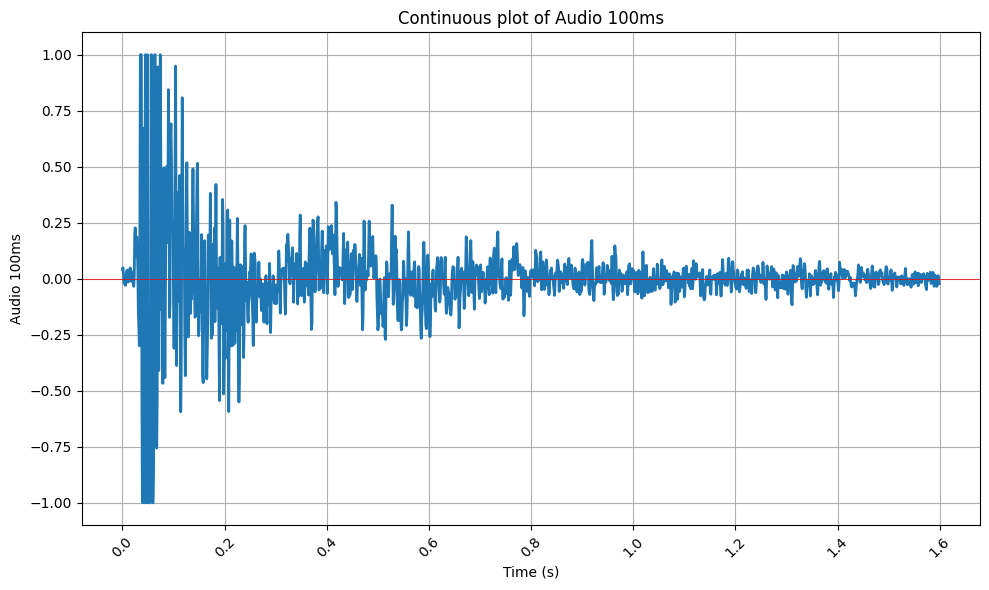

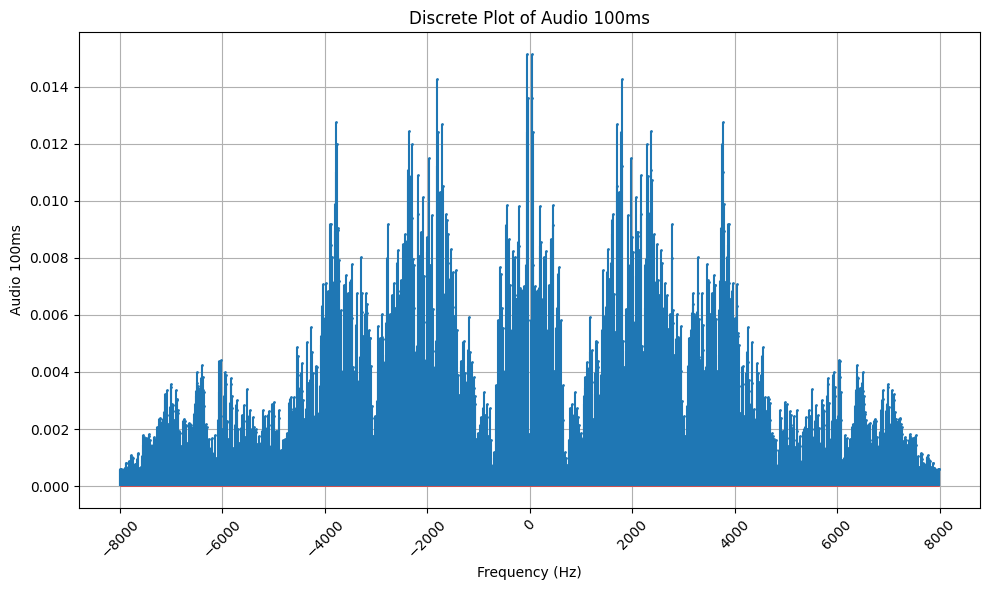

Fundamental Frequency: 50.0 Hz
Fundamental Period: 0.02 s
Power: 0.002 W
Power in dB: -26.072 dB
Energy: 51.388 J
Energy in dB: 17.109 dB


In [3]:
muestras_audio = (15000, 14000, 1500, 18000, 12300)
for i in range(len(audios)):
    freq, y = wavfile.read(audios[i])
    y = y / 2**15
    time_scale = int(freq * 0.1)
    time_vector = np.arange(time_scale) / 1000  # time in ms
    audio_100ms = y[muestras_audio[i] : muestras_audio[i] + time_scale]
    continuous_time_plot(
        time_vector, audio_100ms, variable_name="Audio 100ms", xlabel="Time (s)"
    )

    # Make a fast discrete fourier frecuency plot
    N = len(audio_100ms)
    Y = np.fft.fft(audio_100ms)
    Y = np.abs(Y) / N
    f = np.fft.fftfreq(N, 1 / freq)

    discrete_time_plot(f, Y, variable_name="Audio 100ms", xlabel="Frequency (Hz)")

    # Now we will print the maximum frecuency of each plot for getting the fundamental frecuency
    max_frec = np.max(Y)
    index = np.where(Y == max_frec)
    print(f"Fundamental Frequency: {abs(f[index][0])} Hz")
    print(f"Fundamental Period: {round(1/abs(f[index][0]),3)} s")

    # Now we will calculate the power for each signal
    power = (y**2).mean()
    print(f"Power: {round(power,3)} W")
    print(f"Power in dB: {round(10 * np.log10(power),3)} dB")

    # Now we will calculate the energy for each signal
    energy = np.sum(y**2)
    print(f"Energy: {round(energy,3)} J")
    print(f"Energy in dB: {round(10 * np.log10(energy),3)} dB")

# Exercise 3

Frame length: 1600 samples
Frequency: 16000 Hz


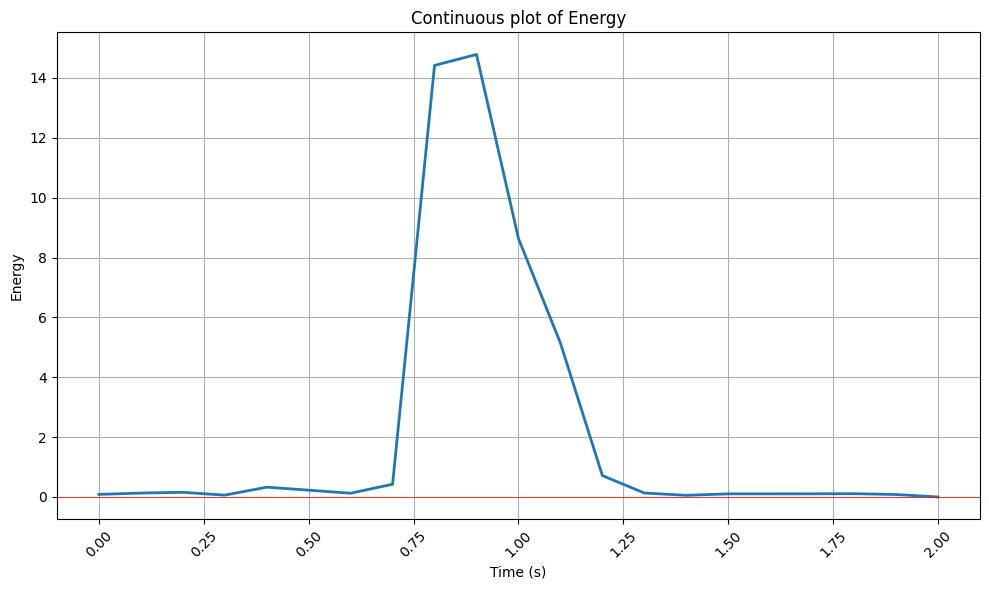

Frequency: 16000 Hz


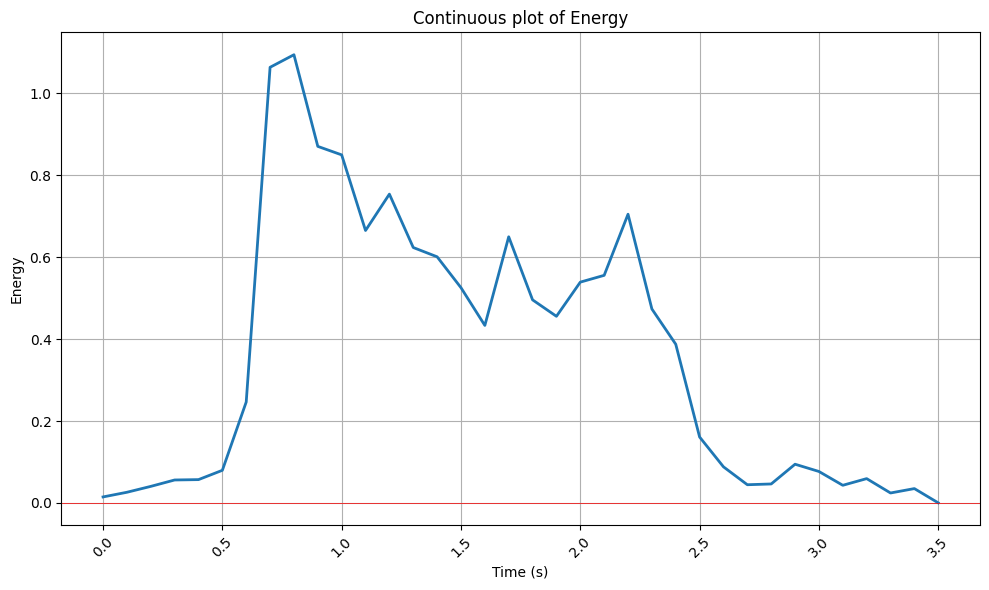

Frequency: 16000 Hz


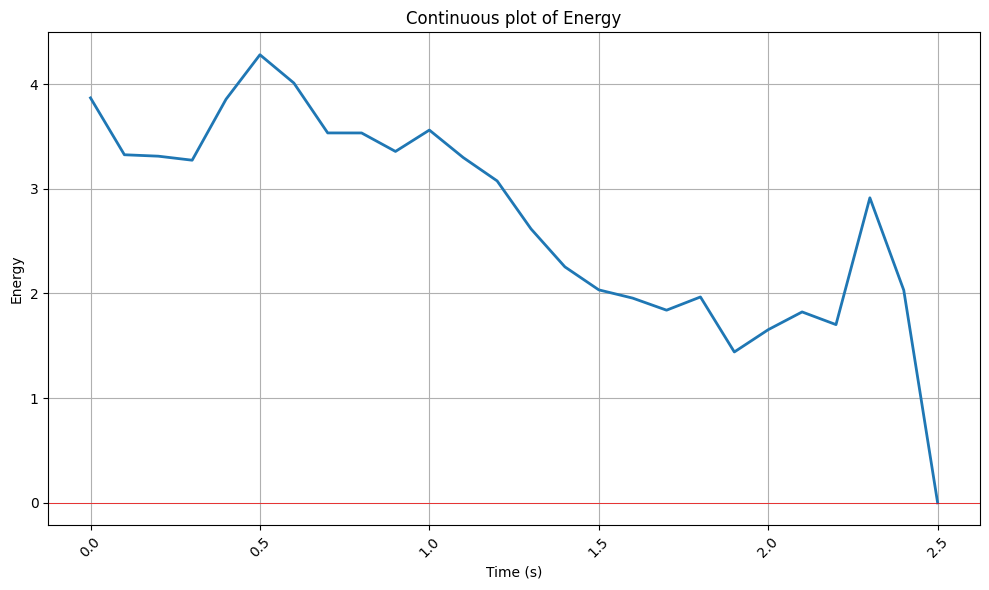

Frequency: 16000 Hz


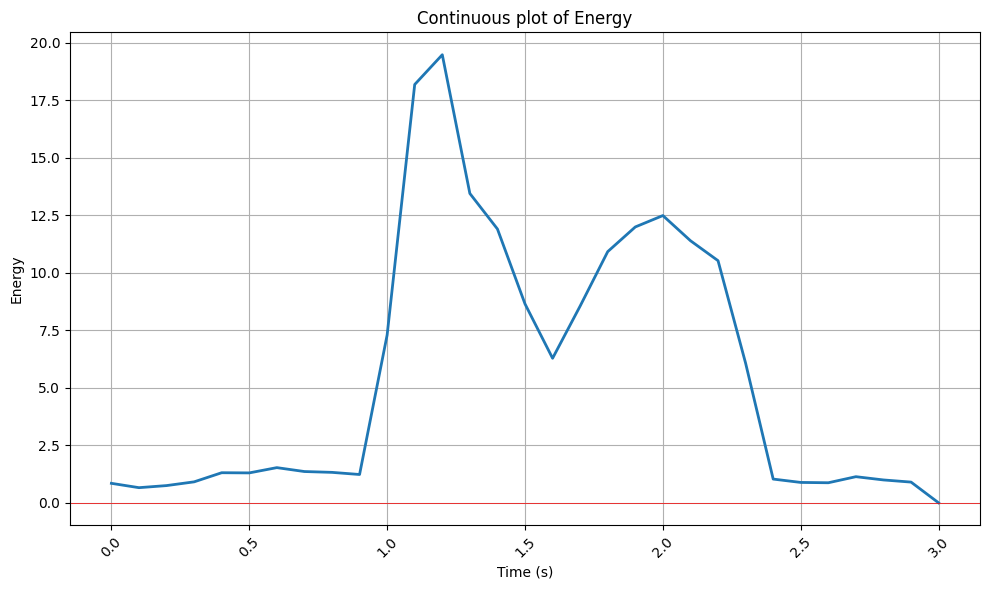

Frequency: 16000 Hz


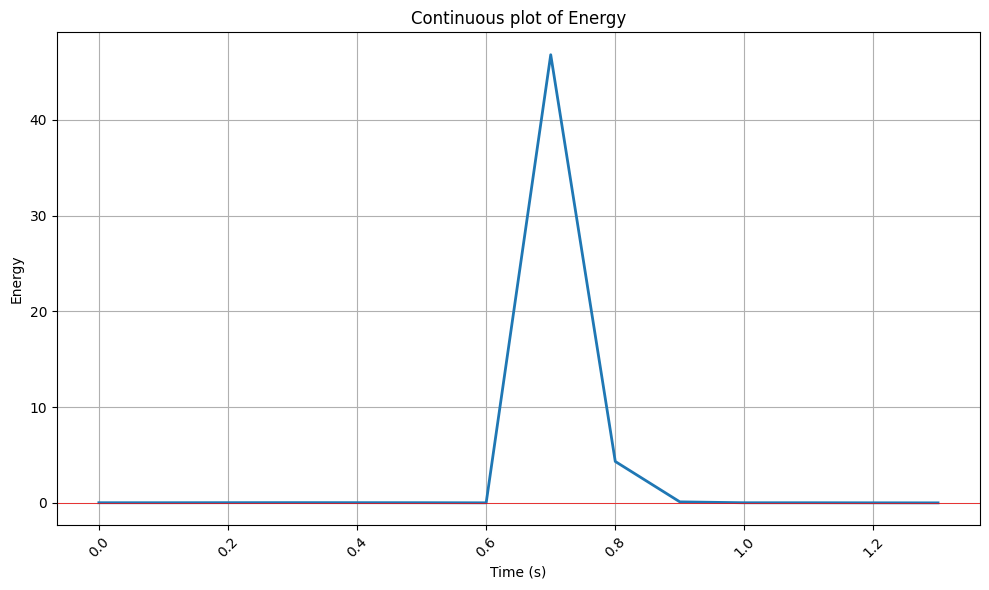

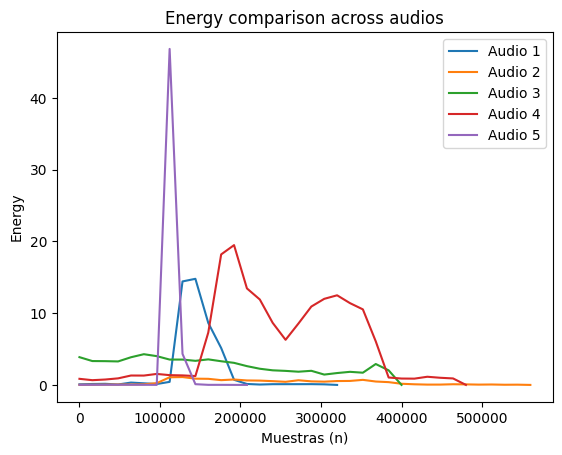

In [4]:
frame_length = int(0.1 * freq)  # 100ms
print(f"Frame length: {frame_length} samples")

energy = []
energy_frames_all = []

# Energy for a 100ms frame
for audio in range(len(audios)):
    freq, datos = wavfile.read(audios[audio])
    print(f"Frequency: {freq} Hz")
    datos = datos / 2**15
    energy.append(np.sum(datos[:frame_length] ** 2))
    energy_frames = []
    # Now we will calculate the energy for each signal by frames

    for frame in range(0, len(datos), frame_length):
        energy_frames.append(np.sum(datos[frame : frame + frame_length] ** 2))

    # Save the current audio's energy frames to the main list
    energy_frames_all.append(energy_frames)
    # Plot the enery for each audio
    continuous_time_plot(
        np.arange(len(energy_frames)) * 0.1,
        energy_frames,
        variable_name="Energy",
        xlabel="Time (s)",
    )
    # Clear the energy_frames list


# Showing all the plots at the same time:
for index, energy_frames in enumerate(energy_frames_all):
    plt.plot(
        np.arange(len(energy_frames)) * freq, energy_frames, label=f"Audio {index + 1}"
    )

plt.xlabel("Muestras (n)")
plt.ylabel("Energy")
plt.legend()
plt.title("Energy comparison across audios")
plt.show()

# Exercise 4

Frame length: 1600 samples


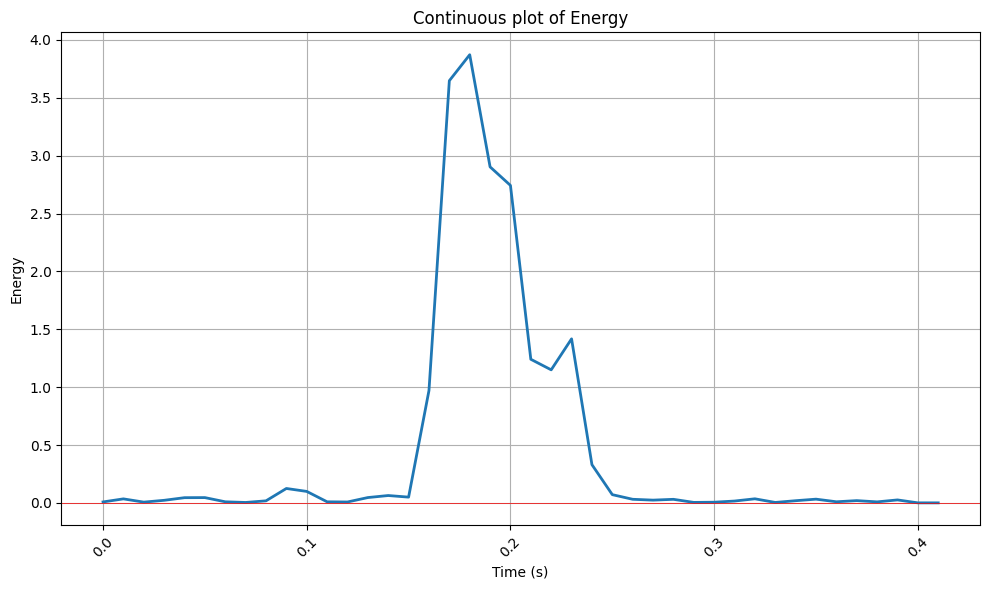

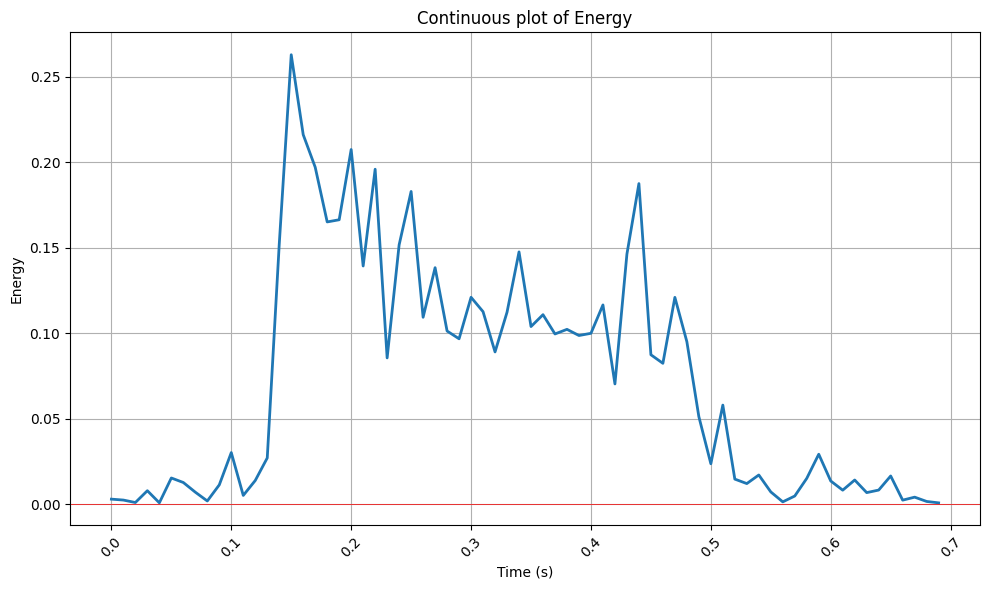

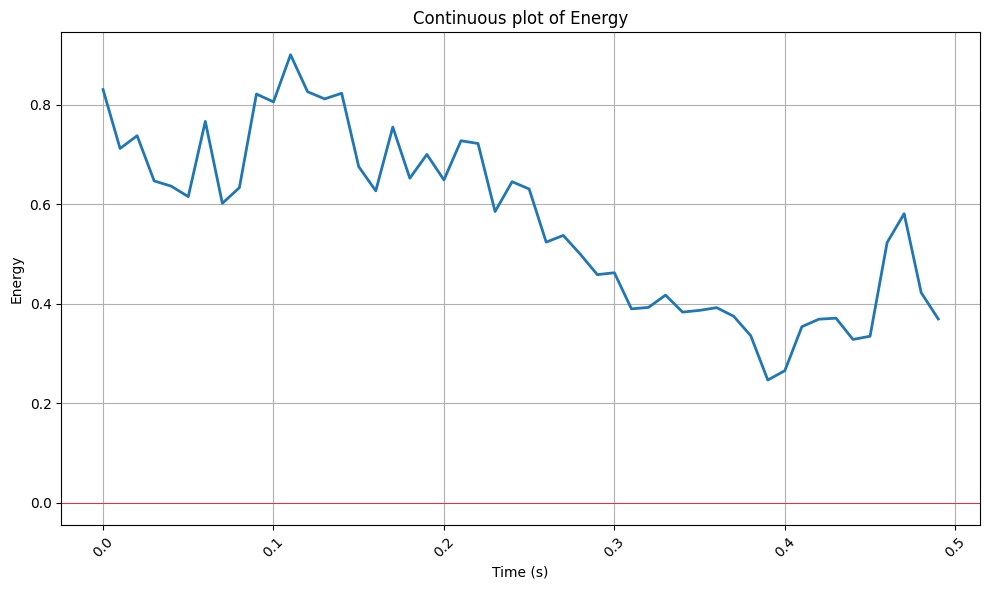

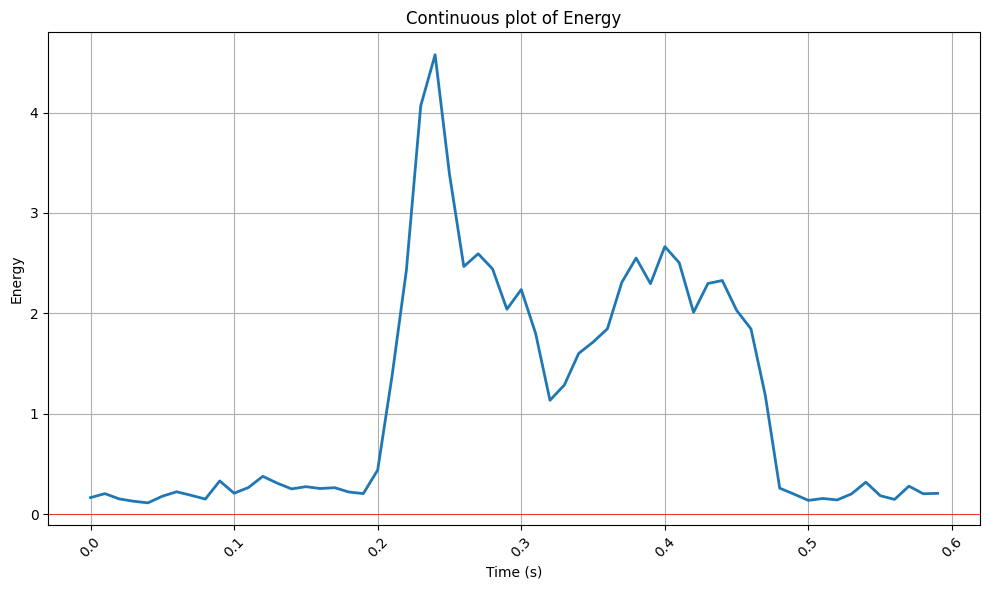

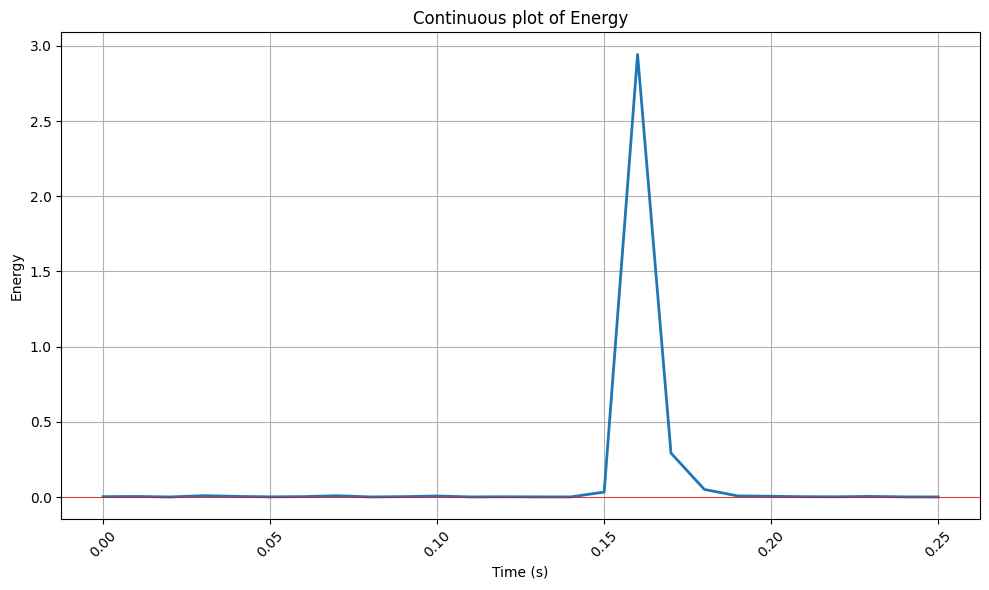

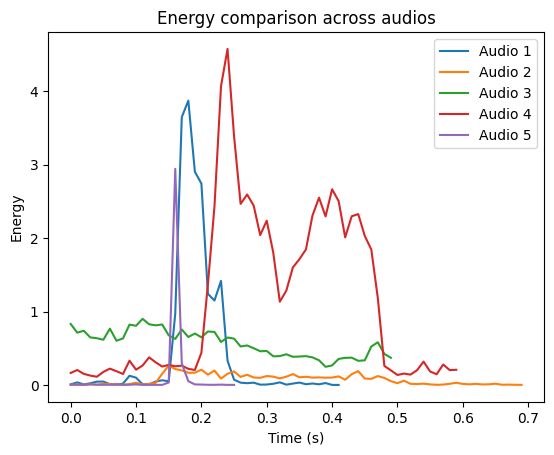

In [5]:
# Now we will calculate the energy for each audio using overlapping frames
energy_frames_all = []
# Assuming the rest of the code remains the same
print(f"Frame length: {frame_length} samples")
overlap = frame_length // 2  # 50% of the frame_length

for audio_index, audio in enumerate(audios):
    freq, datos = wavfile.read(audio)
    datos = datos / 2**15
    frame_length = int(0.02 * freq)  # 20ms

    energy_frames = []

    # Calculate the energy for each signal by frames with 50% overlap
    for frame in range(0, len(datos) - frame_length + 1, overlap):
        energy_frames.append(np.sum(datos[frame : frame + frame_length] ** 2))

    # Save the current audio's energy frames to the main list
    energy_frames_all.append(energy_frames)

    # Plot the energy for each audio
    # Assuming continuous_time_plot is a function you have defined earlier or elsewhere
    continuous_time_plot(
        np.arange(len(energy_frames)) / 100,
        energy_frames,
        variable_name="Energy",
        xlabel="Time (s)",
    )
    # No need to clear energy_frames list since it's being redefined at the start of each loop
# Showing all the plots at the same time:
for index, energy_frames in enumerate(energy_frames_all):
    plt.plot(
        np.arange(len(energy_frames)) / 100,
        energy_frames,
        label=f"Audio {index + 1}",
    )

plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.legend()
plt.title("Energy comparison across audios")
plt.show()

# Exercise 5

/var/folders/n2/bpxkh5j55nx3ym9bf5t445jw0000gn/T/ipykernel_14607/4160165291.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq, datos = wavfile.read(audio_propio)


Frequency: 48000 Hz


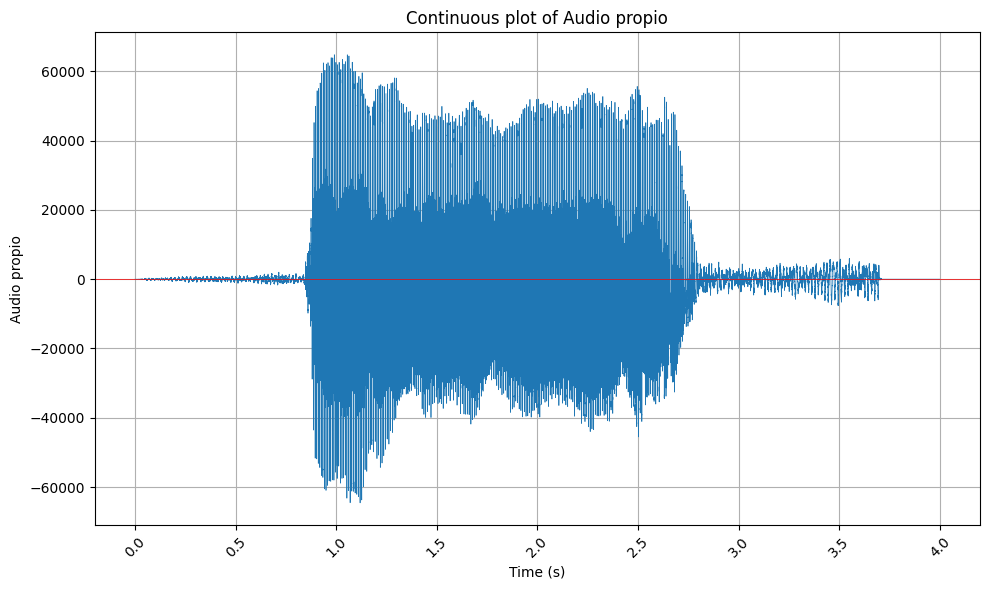

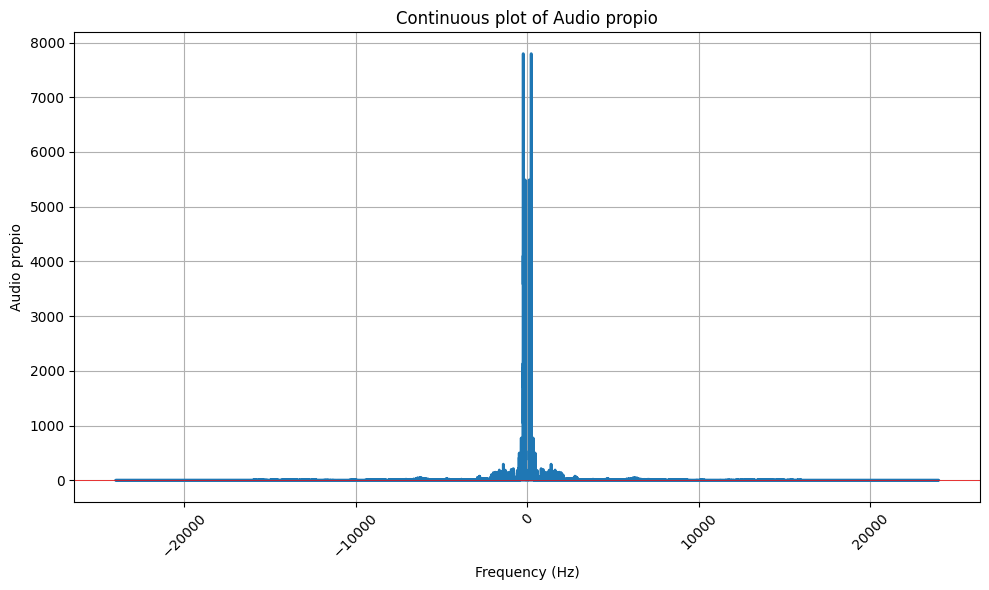

Fundamental Frequency: 232.66666666666666 Hz


In [6]:
freq, datos = wavfile.read(audio_propio)
print(f"Frequency: {freq} Hz")
datos = datos / 2**15

# Now we will make the audio Mono
if datos.ndim > 1:
    datos = datos.mean(axis=1)


# Plot the audio data
continuous_time_plot(
    np.arange(len(datos)) / freq,
    datos,
    variable_name="Audio propio",
    xlabel="Time (s)",
    linewidth=0.5,
)
# Looking at the data we select only from 1s to 2.5s
datos = datos[int(1 * freq) : int(2.5 * freq)]

# Now we will do the FFT for the audio
N = len(datos)
Y = np.fft.fft(datos)
Y = np.abs(Y) / N
f = np.fft.fftfreq(N, 1 / freq)

continuous_time_plot(f, Y, variable_name="Audio propio", xlabel="Frequency (Hz)")

# Now we will print the maximum frecuency of each plot for getting the fundamental frecuency
max_frec = np.max(Y)
index = np.where(Y == max_frec)
print(f"Fundamental Frequency: {abs(f[index[0]][0])} Hz")